<font size='5'>
    NAC 01 - Pumpit
</font><br><br>
<font size='4'>Nomes:<br><br>
    Gabriel Almeida Nunes - RM: 81518<br>
    Leonardo Placer - RM: 80816<br>
    Gabriel Calil - RM: 80140<br>
    Rafael Pitas - RM: 80417<br><br>
    Turma: 3ECA<br><br></font>

<font size='4.5'>
    <b>Introdução</b><br><br>
</font>
<font size='3'>O conjunto de dados com o qual trabalharemos, trata-se de uma iniciativa da Taarifa, empresa que coleta e organiza os dados do Ministério da Água da Tanzânia, sobre as bombas de água distribuídas pelo país e seu nível de operacionalidade.<br>
A tarefa é descobrir com base nas características, na data de instalação e no gerenciamento das bombas quais estão funcionais, quais estão operando parcialmente, e quais estão inutilizadas.<br><br>Para começar, vamos importar as bibliotecas e aplicar os primeiros passos</font>

In [1]:
#Importando bibliotecas que iremos usar na análise exploratória
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

#precisao de casas decimais
pd.set_option("display.precision", 3)
#maximo de colunas
pd.set_option("display.max_columns",200)
#removendo notação científica
pd.reset_option('^display.', silent=True)

<font size='3'>Lendo o conjunto de dados e mostrando o cabeçalho do mesmo</font>

In [2]:
#Carregando o conjunto de dados com o qual iremos trabalhar
df = pd.read_csv('data/pumpit.csv')
#Lendo cabeçalho
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


<font size='3'>Abaixo podemos verificar o tamanho do nosso conjunto de dados</font>

In [3]:
#Tamanho do nosso conjunto de dados
tamanho = len(df)
print(tamanho)

59400


<font size='3'>Nesse caso, significa que iremos trabalhar com os dados de quase 60 mil bombas de água ao redor da Tanzânia</font>

<font size='3'>Podemos ver também quais serão as colunas trabalhadas</font>

In [4]:
#Mostrando as colunas que temos no nosso conjuntos de dados
print(df.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


<font size='3'>E também informações sobre as colunas</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

<font size='3'>Podemos também fazer um describe para adquirir mais informações sobre as colunas, tais como a quantidade total de dados, dados únicos e repetidos etc</font>

In [6]:
df['amount_tsh'].describe(include=['object'])

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

<font size='4'><b>Desenvolvimento</b></font><br><br>
<font size='3'>Agora, dando início ao processo de desenvolvimento, começaremos a dar uma olhada com um cuidado maior aos dados.
    Utilizaremos a estratégia de primeiramente descobrir informações gerais sobre os dados, para depois tentarmos relacioná-los. Por exemplo, vamos primeiramente ver as regiões com mais poços, as bacias que atendem mais poços etc, para depois tentar encontrar relações entre esses dados e cruzar uns com os outros.</font>

<font size='3'>Começaremos vendo na lista abaixo, a região com mais poços</font>

In [7]:
#As 20 regiões com mais poços

df['region'].value_counts()[:20]

Iringa         5294
Shinyanga      4982
Mbeya          4639
Kilimanjaro    4379
Morogoro       4006
Arusha         3350
Kagera         3316
Mwanza         3102
Kigoma         2816
Ruvuma         2640
Pwani          2635
Tanga          2547
Dodoma         2201
Singida        2093
Mara           1969
Tabora         1959
Rukwa          1808
Mtwara         1730
Manyara        1583
Lindi          1546
Name: region, dtype: int64

<font size='3'>Abaixo poderemos ver quais as tecnologias mais comumente utilizadas</font>

In [8]:
#Tecnologias utilizadas para construir o poço
df['waterpoint_type'].value_counts()[:20]

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

<font size='3'>Abaixo podemos ver as organizadoras que mais instalaram poços entre todas</font>

In [9]:
#Aqui nesse trecho, podemos ver quais as 20 organizadoras que mais instalaram poços dentre as listadas

df['installer'].value_counts()[:20]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
World vision            408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

<font size='3'>E aqui as maiores financiadoras</font>

In [10]:
#Aqui vemos quem mais financiou os poços

df['funder'].value_counts()[:20]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

<font size='3'>Aqui podemos ver os grupos que mais tem frente na questão de gerenciamento dos pontos de água</font>

In [11]:
#Grupos de gerenciamento
df['management'].value_counts()[:20]

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

<font size='3'>E aqui podemos ver os métodos de extração mais utilizados</font>

In [12]:
#Tipo de extração utilizada pelo poço
df['extraction_type'].value_counts()[:20]

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

<font size='3'>A tabela abaixo classifica os poços mais antigos</font>

In [13]:
#Alguns poços não possuem data registrada e o valor de saída é 0, portanto, estamos ignorando esses

tmp = df[df['construction_year']>0][['wpt_name', 'construction_year', 'amount_tsh', 'region', 'subvillage', 'installer','funder']]

tmp.sort_values(by='construction_year',ascending=True).head(50)


,wpt_name,construction_year,amount_tsh,region,subvillage,installer,funder
4562,Kwa Wahidi,1960,0.0,Tanga,Malindi,Wahidi,Wahidi
252,Kwa Mahanga,1960,0.0,Kilimanjaro,Maring'A Juu,Central Government,Government Of Tanzania
54434,Church Tag,1960,0.0,Singida,Azimio,NaN,NaN
29002,Shuleni,1960,0.0,Singida,Maswere,NaN,NaN
51754,Kwa Loisule,1960,0.0,Arusha,Muungano,DWE,Government Of Tanzania
1407,Kwa Mzee Mmango,1960,0.0,Lindi,Makumbusho,Government,Government Of Tanzania
56544,Kwa Kitula Mbenge,1960,0.0,Morogoro,Gudugudu,RWE,W.D & I.
42937,Mills,1960,0.0,Singida,Maro,NaN,NaN
18629,Kwa Elisonguo Kawiche,1960,0.0,Kilimanjaro,Kondiki,Central Government,Government Of Tanzania
24663,Athuman,1960,0.0,Singida,Igunga,NaN,NaN


<font size='3'>Vemos como resultado que a maioria dos poços antigos não possuem água disponível</font> 

<font size='3'>Veremos agora uns mais recentes:</font> 

In [14]:
#Aqui podemos observar os poços mais recentes

tmp = df[df['construction_year']>0][['wpt_name', 'construction_year', 'amount_tsh', 'region', 'subvillage', 'installer','funder']]

tmp.sort_values(by='construction_year',ascending=False).head(20)

,wpt_name,construction_year,amount_tsh,region,subvillage,installer,funder
50450,Kabilakabosha,2013,0.0,Kigoma,Ilela,TWESA,Cocern
29345,Zahanati,2013,0.0,Manyara,Tsaayo A,DWE,World Bank
1877,Kwa Regina,2013,6000.0,Kilimanjaro,Kalemane,ISF,Isf
13495,Shule Ya Msingi Nama,2013,0.0,Ruvuma,Namakinga A,DWE,Germany
43258,Mashine A1,2013,500.0,Kilimanjaro,Mashine A,ISF,Isf
51831,Kwa Juma,2013,500.0,Kilimanjaro,Maparakanga,ISF,Isf
16969,Kwa Mzee Mawila,2013,0.0,Ruvuma,Rwanda,Government,Undp
4139,Kagondo,2013,0.0,Kigoma,Nyamalebe A,TWESA,Cocern
23117,Kwa Faustin,2013,0.0,Manyara,Singe,DWE,Ministry Of Water
7079,Muhungani Kati,2013,20.0,Kilimanjaro,Muhungani,ISF,Isf


<font size='3'>Já entre os mais recentes, observamos um comportamento um pouco diferente, com vários poços até ultrapassando a marca de 5000.0</font>

<font size='3'>Abaixo veremos os poços com mais água disponível e os que possuem menos água disponível</font>

In [15]:
#Aqui podemos ver quais poços tem mais água disponível

tmp.sort_values(by='amount_tsh', ascending=False).head(10)

,wpt_name,construction_year,amount_tsh,region,subvillage,installer,funder
10812,Mtinko Primary,1990,350000.0,Singida,Mlimani,NaN,NaN
22191,Miono Dispensary,2003,250000.0,Pwani,Kipera B,WU,Ded
45067,Chuo Cha Ualimu,2008,170000.0,Pwani,Madukani,WU,Owner Pingo C
9961,College Of Library,2007,138000.0,Pwani,Ukuni,Da,Parastatal
9917,Pentecoste Church,2011,120000.0,Kilimanjaro,Zahanati,Villagers,Villagers
5558,Elementary School,1972,117000.0,Iringa,Lungemba,lutheran church,Lutheran Church
57811,Bible College,1992,117000.0,Iringa,Lungemba,lutheran church,Lutheran Church
44381,Kidugala Seminary,2010,117000.0,Iringa,Lungemba,lutheran church,Lutheran Church
10615,Usharikani,1972,117000.0,Iringa,Lungemba,CONCERN,Concern
54595,Kidugala Seminary,1992,117000.0,Iringa,Lungemba,lutheran church,Lutheran Church


In [16]:
#Aqui podemos ver quais poços tem menos água disponível

tmp.sort_values(by='amount_tsh', ascending=True).head(10)

,wpt_name,construction_year,amount_tsh,region,subvillage,installer,funder
29683,Kwa Tanu Maduhu,1991,0.0,Mara,Nyamakombo,DWE,Hesawa
34016,Zahanati,1998,0.0,Mara,Sokoni,Hesawa,Hesawa
34013,Kwa Kikambala,2002,0.0,Kilimanjaro,Majengo,Government,Government Of Tanzania
34011,Kwa John Mokongo,1972,0.0,Kilimanjaro,Imi,DWE,Government Of Tanzania
34008,Kwa Jongo,2004,0.0,Pwani,Picha Ya Ndege,Kuwait,Kuwait
34004,Msikitini 2,2009,0.0,Pwani,Mbunju,DWE,Dwe
34002,Kwa Charles,1996,0.0,Kilimanjaro,Miyombo,TCRS,Tcrs
33998,Shuleni,1974,0.0,Manyara,Makirinya,DWE,Government Of Tanzania
33997,Musa Kilonga,1988,0.0,Pwani,Kilula Kati,Mchuk,Mchukwi Hos
33993,Kwa Gasper Kimaro,2004,0.0,Kilimanjaro,Tanya,Kiliwater,Kiliwater


<font size='4'><b>Questão Semântica 01 - Relacionar a quantidade de poços que existem em cada região pela quantidade de água disponível na região. Dessa forma, poderemos saber quanto de água há disponível para cada poço. Depois podemos osbervar características dominantes entre os extremos de regiões mais e menos abastecidas e perceber se o padrão se repete na maioria das regiões.</b></font>

<font size='3'>Abaixo podemos dar uma olhada quanto a quantidade de água que possuem as regiões</font><br><br>
<font size='2.5'>Obs: Utilizaremos as regiões como referência geográfica , pois é uma quantidade de dados mais manipulável e é algo mais ilustrativo que utilizar estados, províncias, cidades ou coordenadas</font>

In [17]:
#Aqui vemos o total da quantidade de água das regiões, da que mais tem água para a que menos tem
pd.options.display.float_format = '{:,.2f}'.format
df.groupby(by='region')['amount_tsh'].sum().sort_values(ascending=False)


region
Iringa          6,386,405.00
Ruvuma          2,368,302.00
Pwani           1,728,845.00
Rukwa           1,485,835.00
Arusha          1,209,095.00
Kilimanjaro     1,124,644.65
Kigoma            979,005.00
Singida           944,430.20
Morogoro          841,767.00
Tanga             728,478.00
Manyara           415,480.00
Mara              214,386.00
Dar es Salaam     190,549.00
Mtwara            103,046.00
Shinyanga          56,200.00
Mwanza             48,050.00
Lindi              43,915.00
Tabora                  0.00
Kagera                  0.00
Dodoma                  0.00
Mbeya                   0.00
Name: amount_tsh, dtype: float64

<font size='3.5'>
    Podemos concluir sobre os dados que acima que os poços das regiões de Tabora, Kagera, Dodoma e Mbeya provavelmente não vão operar, pois nessas regiões a quantidade de água disponível é 0.
</font>    

<font size='4'><b>Vejamos como esses dados se apresentam em um gráfico</b></font>

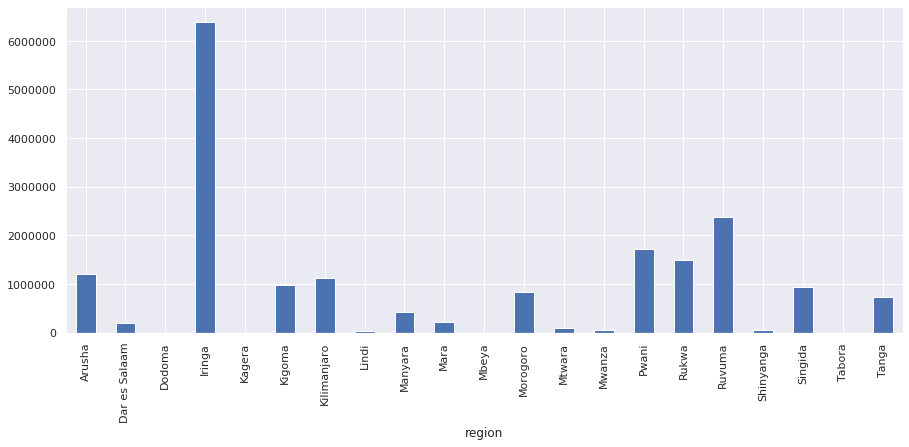

In [18]:
plt.figure(figsize=(15,6))
_ = df.groupby(['region'])['amount_tsh'].sum().plot(kind='bar')

<font size='3'>Segundo esse gráfico, podemos concluir que a região de Iringa é a que mais tem propensão a proporcionar água para os poços, pois é a região com mais poços e também é a região com a maior quantidade de água por poço.


In [19]:
df2=(df.groupby(by='region')['amount_tsh'].sum()/df['region'].value_counts()[:tamanho]).sort_values(ascending=False)
print(df2)

Iringa          1,206.35
Ruvuma            897.08
Rukwa             821.81
Pwani             656.11
Singida           451.23
Arusha            360.92
Kigoma            347.66
Tanga             286.01
Manyara           262.46
Kilimanjaro       256.83
Dar es Salaam     236.71
Morogoro          210.13
Mara              108.88
Mtwara             59.56
Lindi              28.41
Mwanza             15.49
Shinyanga          11.28
Tabora              0.00
Kagera              0.00
Dodoma              0.00
Mbeya               0.00
dtype: float64


<font size='3'>Podemos perceber que em regra, as regiões que possuem uma maior quantidade de água nem sempre são as que possuem a maior quantidade de poços, mas sempre tem uma quantidade de água por poço bem farta. Destaque para Iringa, que é a região com mais água, mais poços e mais água disponível por poço. Isso pode indicar que de certa forma, a tendência é que os poços em Iringa tenham uma maior tendência a operar com eficiência, pois falta de água não tende a ser um problema nessa região.</font>

<font size='3'>Podemos fazer um exercício interessante para checar quais as regiões, os instaladores, financiadores e gerenciadores, tanto dos poços acima da média quanto dos poços abaixo da média, tanto da região mais bem abastada como é o caso de Iringa, como da região mais fraca entre as que ainda possuem alguma água, que é Shinyanga</font>

In [20]:
tmp=df[(df.amount_tsh>df2.iloc[0])&(df.region=="Iringa")][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=False).head(20)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
10615,Usharikani,river,"117,000.00",Iringa,Lungemba,CONCERN,Concern,wua,gravity,150
54595,Kidugala Seminary,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,100
37459,Hostel,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,20
45470,Kidugala Seminary,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,600
5558,Elementary School,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,60
57811,Bible College,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,400
44381,Kidugala Seminary,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,600
12895,none,spring,"50,000.00",Iringa,Uwemba Magharibi,SHULE,Shule,vwc,other,900
3245,none,spring,"40,000.00",Iringa,Ulete,Kalta,Kalta,vwc,gravity,1
543,none,spring,"40,000.00",Iringa,Ulete,DWE,Idc,vwc,gravity,430


<font size='3'>Vemos então, que em Iringa, região com muita água disponível, temos as seguintes conclusões<br><br>
1- Os gerenciadores dominantes são wua e vwc<Br>
2- O tipo de extração favorito é gravidade<br>
3- A igreja luterana aparece como grande financiadora e instalador. Também aparecem muito Secondary School e IDYDC<br>
4- A subvillage "preferida" é Lungemba<br>
5- A fonte dominante trata-se dos rios</font>

In [21]:
tmp=df[(df.amount_tsh<df2.iloc[0])&(df.region=="Iringa")][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=False).head(20)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
6463,none,spring,"1,200.00",Iringa,I,DWE,Danida,vwc,gravity,0
38553,none,spring,"1,200.00",Iringa,Ubamba A,Commu,Government Of Tanzania,wua,gravity,0
4707,none,spring,"1,200.00",Iringa,L,DWE,Conce,wua,gravity,0
43778,none,spring,"1,200.00",Iringa,Uyasimwa,Commu,Government Of Tanzania,wua,gravity,0
38408,none,spring,"1,200.00",Iringa,I,DWE,Danida,wua,gravity,0
54908,none,spring,"1,200.00",Iringa,Itende,Commu,Government Of Tanzania,wua,gravity,0
14483,none,machine dbh,"1,200.00",Iringa,I,LIVI,Livin,wua,india mark ii,0
14486,none,spring,"1,200.00",Iringa,M,DWE,Danida,vwc,gravity,0
43744,none,spring,"1,200.00",Iringa,I,DWE,Rc Ch,vwc,gravity,0
14525,none,spring,"1,200.00",Iringa,I,DWE,Rc Ch,vwc,gravity,0


<font size='3'>Entre os menores, percebemos que o gerenciador e o tipo de extração continuam dominando vwc/wua e gravidade, respectivamente, porém, os financiadores e os instaladores variam muito, e os líderes entre os maiores, nem figuram nesse trecho. DWE e Commu parecem ser os instaladores mais comuns e o Governo da Tanzânia tem a maior incidência entre os financiadores. A fonte mais usada é nascente, um grande sinal que será melhor explorado posteriormente.</font>

<font size='3'>Agora vamos ver os padrões que se repetem em Shinyanga, região com a menor quantidade de água entre as que tem alguma</font>

In [22]:
tmp=df[(df.amount_tsh>df2.iloc[16])&(df.region=="Shinyanga")][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=False).head(20)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
47201,Nguvu Kazi,shallow well,"50,000.00",Shinyanga,Madukani,WVT,Wvt,wug,nira/tanira,400
795,Upendo,shallow well,"1,000.00",Shinyanga,Kiluluma,LWI,Lwi,wug,india mark ii,300
22668,Mpogolo,shallow well,"1,000.00",Shinyanga,Ngubu,DWE,Rwssp,wug,nira/tanira,270
56569,Mayumela,other,"1,000.00",Shinyanga,Mbesi,DWE,Sdg,wug,other,100
31407,Roketo,shallow well,500.00,Shinyanga,Mwaburugu,DWE,Dwsp,wug,nira/tanira,500
55123,Amani,shallow well,500.00,Shinyanga,Dusala,DWE,Rwssp,wug,nira/tanira,300
55717,Shule Ya Sekondari Nkoma,rainwater harvesting,500.00,Shinyanga,Nkoma Mjini,WVT,Wvt,parastatal,gravity,500
58789,Shule Ya Sekondari Nkoma,rainwater harvesting,500.00,Shinyanga,Nkoma Mjini,WVT,Wvt,parastatal,gravity,500
15487,Muungano,shallow well,300.00,Shinyanga,Shenu,DWE,Dwsp,wug,nira/tanira,500
13616,Muungano,shallow well,200.00,Shinyanga,Mbesi,WVT,Wvt,wug,nira/tanira,500


In [23]:
tmp=df[(df.amount_tsh<df2.iloc[16])&(df.region=="Shinyanga")][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=True).head(20)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
6,Kwa Ngomho,machine dbh,0.00,Shinyanga,Ishinabulandi,DWSP,Dwsp,vwc,swn 80,0
39509,Upendo,shallow well,0.00,Shinyanga,Kadashi,DWE,Dwsp,wug,swn 80,0
39506,Garden,shallow well,0.00,Shinyanga,Ngato,DWE,Netherlands,wug,swn 80,0
39494,Kwa Masele Maighe,shallow well,0.00,Shinyanga,Mwamakono,Government,Government Of Tanzania,wug,other,0
39482,Buhima,shallow well,0.00,Shinyanga,Majahida Kati,DWE,Dwsp,wug,swn 80,0
39478,Kwa Jilala,shallow well,0.00,Shinyanga,Ngongwa,Government,Government Of Tanzania,vwc,nira/tanira,0
39477,Nyobasaida,shallow well,0.00,Shinyanga,Mwakaduba,DWE,Dwsp,wug,other,0
39456,Imalanota,shallow well,0.00,Shinyanga,Isageng'He,LWI,Lwi,wug,india mark ii,0
39420,Kwa Paskali Maige,spring,0.00,Shinyanga,Mpera,WEDECO,Adp,vwc,gravity,0
39401,Mwatobo,lake,0.00,Shinyanga,Mwatobo,CCEC,Urt,vwc,gravity,0


<font size='3'>Em Shinyanga, vemos que a instaladora DWE domina entre os maiores, porém, aparece pouco entre os menores. Normalmente o gerenciador é wug, independente da quantidade, bem diferente do que acontece em Iringa. O método de extração mais comum é nira/tanira, principalmente entre os poços mais bem abastecidos, sendo que gravidade pouco aparece na lista. A preferência por poços rasos é dominante nessa região.</font>

<font size='3'>Vamos oservar se o padrão de ambas as regiões pode ser observada em casos gerais, envolvendo todo o país</font>

In [24]:
#Média geral das regiões
md_agua_geral = df['amount_tsh'].mean()
print(md_agua_geral)

317.6503846801347


In [25]:
tmp=df[(df.amount_tsh>md_agua_geral)][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=False).head(50)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
10812,Mtinko Primary,machine dbh,"350,000.00",Singida,Mlimani,NaN,NaN,vwc,mono,886
22191,Miono Dispensary,river,"250,000.00",Pwani,Kipera B,WU,Ded,parastatal,ksb,80
22817,Shuleni,river,"200,000.00",Tanga,Pongwe Kaskazini,Government,Government Of Tanzania,vwc,submersible,800
45067,Chuo Cha Ualimu,river,"170,000.00",Pwani,Madukani,WU,Owner Pingo C,parastatal,ksb,150
9961,College Of Library,river,"138,000.00",Pwani,Ukuni,Da,Parastatal,parastatal,ksb,587
9917,Pentecoste Church,river,"120,000.00",Kilimanjaro,Zahanati,Villagers,Villagers,wug,gravity,120
45470,Kidugala Seminary,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,600
44381,Kidugala Seminary,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,600
5558,Elementary School,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,60
37459,Hostel,river,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church,wua,gravity,20


<font size='3'>Vemos que entre os pontos acima da média, há uma variação muito grande em todos os aspectos. O único padrão que constantemente se repete independente da região é a fonte ser em maioria rios, como já se notava entre as maiores de Iringa, porém, esse aspecto abordaremos com mais cuidado no futuro.</font>

In [26]:
tmp=df[(df.amount_tsh<md_agua_geral)][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=False).head(50)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
4186,Vibandani,machine dbh,306.00,Mtwara,Dodoma,Makonde water population,Makonde Water Population,vwc,submersible,1520
44909,Kwa Maricha,river,300.00,Kilimanjaro,Kighu,Central govt,Government Of Tanzania,water board,gravity,180
26783,Tembo,river,300.00,Morogoro,Nyandeo,DWE,Dhv,vwc,gravity,245
56084,Mkongo Primary School,machine dbh,300.00,Pwani,Nyipala,DWE,Dwe,vwc,mono,1
12304,Kwa Mzee Msafari,spring,300.00,Kilimanjaro,Lokini,District Council,District Council,vwc,gravity,40
54403,Kwa Costantine Mwanga,spring,300.00,Kilimanjaro,Urou,CES,Germany Republi,water board,gravity,95
4159,Kwa Kurunge,shallow well,300.00,Morogoro,Apendae,Local te,I Wash,vwc,other - rope pump,50
29057,Zahanati,rainwater harvesting,300.00,Kigoma,Kabasaka,MSF,Msf,parastatal,gravity,180
44211,Kwa Daud Uromy,spring,300.00,Kilimanjaro,Kishale,CES,Germany Republi,water board,gravity,65
8540,Kiluani,shallow well,300.00,Tanga,Mwivano,Korogwe water works,Devon Aid Korogwe,vwc,nira/tanira,300


<font size='3'>Apesar de selecionarmos poços acima da média, selecionamos aqueles que apresentam mais proximidade do valor central. Nesse grupo, mais próximo da média, vemos uma maior preferência por gravidade como método de exploração e por vwc como gerenciadora.</font>

In [27]:
tmp=df[(df.amount_tsh<md_agua_geral)][['wpt_name', 'source', 'amount_tsh', 'region', 'subvillage', 'installer','funder','management','extraction_type', 'population']]
tmp.sort_values(by='amount_tsh',ascending=True).head(50)

,wpt_name,source,amount_tsh,region,subvillage,installer,funder,management,extraction_type,population
1,Zahanati,rainwater harvesting,0.00,Mara,Nyamara,GRUMETI,Grumeti,wug,gravity,280
37469,Manyata,spring,0.00,Dodoma,Manyata,World,World Bank,vwc,gravity,0
37471,Boniface Kampango,shallow well,0.00,Mara,Sedeco,HESAWA,Hesawa,private operator,nira/tanira,400
37473,Kwa Lamakoo,river,0.00,Arusha,Eworendeke,IREVEA SISTER,Irevea Sister,vwc,gravity,350
37474,Nyigise Mayola,shallow well,0.00,Mbeya,Njia Panda,KKKT,Kkkt,vwc,nira/tanira,0
37477,Maperani,shallow well,0.00,Kagera,Kasenda,HESAWA,Hesawa,wua,nira/tanira,0
37478,Buhaji,shallow well,0.00,Mwanza,Buhaji,HESAWA,Hesawa,vwc,other,0
37480,Shuleni,rainwater harvesting,0.00,Arusha,Kitosokoine,NaN,NaN,parastatal,other,1
37481,Nuja,shallow well,0.00,Shinyanga,Nuja,DWE,Rwssp,vwc,other,0
37468,Kwa Mokoro,spring,0.00,Arusha,Madukani,VILLAGERS,Global Fund,vwc,gravity,500


<font size='3'>Entre os menores de todos, vemos que não há nenhum padrão, a não ser o gerenciador que costuma ser vwc<br><br>
No geral, podemos concluir que próximo a rios, os poços tender a apresentar uma maior chance de possuir água nas redondezas e a Igreja Luterana aparece como forte instaladora e financiadora. Entre os menores, não vemos muito padrão, a não ser o fato de que na região onde a água é mais escassa, os poços mais eficazes costumam uitilizar nira/tanira como tipo de extração.</font>

<font size='4'><b>Questão Semântica 02 - Algo que pode influenciar na quantidade de água disponível ao redor do poço, é a bacia que banha a região.<b></font><br><br>
<font size='3'>Primeiro, vamos ver todos as bacias existentes e quantidade de poços que banham</font>

In [28]:
df['basin'].value_counts()[:20]

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

<font size='3'>Lake Victoria é a bacia que banha a maior quantidade de poços, o que não significa necessariamente que todos os poços banhados por ela irão funcionar plenamente, pois pode ser sobrecarregada devido a esse fator</font>

In [29]:
tmp = df[['wpt_name', 'basin', 'amount_tsh', 'region', 'subvillage', 'installer','funder']]

tmp.sort_values(by='amount_tsh',ascending=False).head(50)

,wpt_name,basin,amount_tsh,region,subvillage,installer,funder
10812,Mtinko Primary,Internal,"350,000.00",Singida,Mlimani,NaN,NaN
22191,Miono Dispensary,Wami / Ruvu,"250,000.00",Pwani,Kipera B,WU,Ded
22817,Shuleni,Pangani,"200,000.00",Tanga,Pongwe Kaskazini,Government,Government Of Tanzania
45067,Chuo Cha Ualimu,Wami / Ruvu,"170,000.00",Pwani,Madukani,WU,Owner Pingo C
9961,College Of Library,Wami / Ruvu,"138,000.00",Pwani,Ukuni,Da,Parastatal
9917,Pentecoste Church,Pangani,"120,000.00",Kilimanjaro,Zahanati,Villagers,Villagers
37459,Hostel,Rufiji,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church
44381,Kidugala Seminary,Rufiji,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church
54595,Kidugala Seminary,Rufiji,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church
45470,Kidugala Seminary,Rufiji,"117,000.00",Iringa,Lungemba,lutheran church,Lutheran Church


<font size='3'>O poço com a maior quantidade de água disponível é banhado pela bacia "Internal", porém, a bacia Rufiji parece banhar a maioria dos poços "fartos" de água, podemos atestar a veracidade desse fato abaixo.</font>

In [30]:
df.groupby(by='basin')['amount_tsh'].mean().sort_values(ascending=False)


basin
Rufiji                    726.07
Lake Nyasa                533.30
Lake Rukwa                452.71
Wami / Ruvu               367.38
Pangani                   297.25
Ruvuma / Southern Coast   228.39
Internal                  218.17
Lake Tanganyika           210.54
Lake Victoria              31.10
Name: amount_tsh, dtype: float64

<font size='3'>Podemos constatar alguns importantes fatos acima:<br><Br>
    1- A maior parte da água que a bacia "Internal" tem a oferecer está destinada ao poço Mtinko Primary, já que a média de água disponível por poço ao redor da referida bacia é muito inferior ao que é utilizado para a Mtinko.<br><br>
    2- Rufiji tem alguns dos poços mais banhados e mantém a maior média de todas para poços em geral.<br><br>
    3- Lake Victoria é a bacia que banha mais poços, porém, tem a menor média de todas, o que pode indicar uma espécia de sobrecarga.</font>

In [31]:
df.groupby(by='basin')['amount_tsh'].sum().sort_values(ascending=False)


basin
Rufiji                    5,791,160.00
Lake Nyasa                2,711,840.00
Pangani                   2,657,407.65
Wami / Ruvu               2,199,511.00
Internal                  1,698,480.20
Lake Tanganyika           1,354,195.00
Lake Rukwa                1,110,945.00
Ruvuma / Southern Coast   1,026,158.00
Lake Victoria               318,736.00
Name: amount_tsh, dtype: float64

<font size='3'>A bacia Lake Victoria fornece pouca água e fornece para muitos poços, o que explica sua média muito baixa. Como já era de se esperar, Rufiji tem a maior quantidade de água total.</font>

In [32]:
#Aqui faremos alguma opreações para descobrir a pocentagem de água que a Mtinko Primary toma do total de água
#proporcionado pela bacia internal

internal = df[df['basin']=="Internal"][['basin','amount_tsh']]
soma_internal=internal.groupby(by='basin')['amount_tsh'].sum()
fsi=float(soma_internal)
#Pegando o dado da quantidade de água total da Internal e transformando em float

m1 = df.loc[df.wpt_name=="Mtinko Primary",'amount_tsh']
fm1=float(m1)
porcfm1 = (fm1/fsi)*100
print("A porcentagem de água que a Mtinko Primary toma da bacia Internal é de: " + '{:.2f}%'.format(porcfm1))
#Pegando o dado específico da Mtinko Primary

A porcentagem de água que a Mtinko Primary toma da bacia Internal é de: 20.61%


<font size='3'>Vemos que a Mtinko Primary toma um total de 20.61% da água disponível pela bacia Internal, o que indica que o restante de água que a bacia tem a oferecer provavelmente não será extremamente abundante para os outros poços da região.</font>

<font size='3'>Podemos oservar qual o tipo de fonte que a maioria dos poços banhados pela Internal utilizam</font>

In [33]:
tmp = df[df['basin']=="Internal"][['wpt_name', 'basin', 'amount_tsh', 'region', 'source', 'installer','funder', 'extraction_type']]

tmp.sort_values(by='amount_tsh',ascending=False).head(50)

,wpt_name,basin,amount_tsh,region,source,installer,funder,extraction_type
10812,Mtinko Primary,Internal,"350,000.00",Singida,machine dbh,NaN,NaN,mono
50494,Shule Ya Msingi Makame,Internal,"50,000.00",Manyara,machine dbh,Water board,Water Board,submersible
34865,Shule,Internal,"20,000.00",Manyara,spring,Dmdd,Dmdd,gravity
27998,Kanisani,Internal,"15,000.00",Arusha,river,SULEMAN IDD,Pentecosta Church,gravity
24520,Shuleni,Internal,"15,000.00",Arusha,river,JANDU PLUMBER CO,Adb,gravity
22395,Nduhuyu,Internal,"15,000.00",Singida,machine dbh,SHY BUILDERS,World Vision,afridev
57622,Kanisani,Internal,"15,000.00",Arusha,river,COMPASION INTERNATIO,Compasion International,gravity
16090,Mzwami,Internal,"13,000.00",Singida,machine dbh,SEMA,Wateraid,afridev
58254,Dip Kibaoni A,Internal,"12,000.00",Kilimanjaro,spring,Kiliwater,Kiliwater,gravity
43339,Dip Kibaoni B,Internal,"12,000.00",Kilimanjaro,spring,Kiliwater,Kiliwater,gravity


<font size='3'>Vemos que há uma grande dominância das máquinas dbh, o que pode indicar uma quantidade menor de rios ao redor das regiões. O tipo de extração dominante é gravidade.</font>

<font size='3'>Vamos ver Rufiji que é a bacia que mais fornece água</font>

In [34]:
tmp = df[df['basin']=="Rufiji"][['wpt_name', 'basin', 'amount_tsh', 'region', 'source', 'installer','funder', 'population','extraction_type']]

tmp.sort_values(by='amount_tsh',ascending=False).head(50)

,wpt_name,basin,amount_tsh,region,source,installer,funder,population,extraction_type
37459,Hostel,Rufiji,"117,000.00",Iringa,river,lutheran church,Lutheran Church,20,gravity
5558,Elementary School,Rufiji,"117,000.00",Iringa,river,lutheran church,Lutheran Church,60,gravity
45470,Kidugala Seminary,Rufiji,"117,000.00",Iringa,river,lutheran church,Lutheran Church,600,gravity
57811,Bible College,Rufiji,"117,000.00",Iringa,river,lutheran church,Lutheran Church,400,gravity
54595,Kidugala Seminary,Rufiji,"117,000.00",Iringa,river,lutheran church,Lutheran Church,100,gravity
44381,Kidugala Seminary,Rufiji,"117,000.00",Iringa,river,lutheran church,Lutheran Church,600,gravity
10615,Usharikani,Rufiji,"117,000.00",Iringa,river,CONCERN,Concern,150,gravity
12895,none,Rufiji,"50,000.00",Iringa,spring,SHULE,Shule,900,other
44803,none,Rufiji,"40,000.00",Iringa,spring,Kalta,Kalta,430,gravity
3245,none,Rufiji,"40,000.00",Iringa,spring,Kalta,Kalta,1,gravity


<font size='3'>Rufiji banha a região de mais "sucesso" de todas que é Iringa, e já podemos perceber uma maior preferência por rios e nascentes, ou seja, "meios naturais", vamos atestar esse fato mais algumas vezes abaixo. O tipo de extração ainda mais dominante aqui é gravidade</font>

<font size='3'>Vamos ver agora quais normalmente são as fontes utilizadas pelos pontos de água no geral</font>

In [35]:
df['source'].value_counts()[:20]

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [36]:
df.groupby(by='source')['amount_tsh'].mean().sort_values(ascending=False)

source
river                  712.78
spring                 382.03
hand dtw               365.40
machine dbh            310.82
lake                   149.48
dam                    122.48
unknown                108.03
shallow well            89.97
other                   57.22
rainwater harvesting    10.98
Name: amount_tsh, dtype: float64

<font size='3'>Vemos que a maioria dos poços utilizam de nascentes, mas o que se dão melhor em questão de abundância de água são os que se localizam próximos a rios.</font>

In [37]:
df['source_class'].value_counts()[:20]

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [38]:
df.groupby(by='source_class')['amount_tsh'].mean().sort_values(ascending=False)

source_class
surface       530.55
groundwater   257.20
unknown        69.28
Name: amount_tsh, dtype: float64

<font size='3'>Vemos também que há mais poços de fontes provenientes de terra, porém os que em média costumam possuir mais água são os de fontes provenientes da superfície.</font>

<font size='3'>Já que sabemos que em Rufiji, temos a bacia com mais água disponível, podemos analisar quais os tipos de fonte mais utilizados por lá.</font>

In [39]:
df[df['basin']=='Rufiji'].groupby(by='source')['amount_tsh'].sum().sort_values(ascending=False)

source
spring                 2,577,780.00
river                  2,375,790.00
shallow well             369,875.00
machine dbh              248,365.00
hand dtw                 214,340.00
unknown                    4,700.00
rainwater harvesting         250.00
dam                           60.00
other                          0.00
lake                           0.00
Name: amount_tsh, dtype: float64

<font size='3'>Como já visto anteriormente, os poços dessa região, são abastecidos principalmente por nascentes e rios, provavelmente por serem banhados pela bacia mais eficiente entre as datadas.</font>

<font size='3'>Sobre essa questão semântica, podemos concluir que as bacias de água tem direta influência na eficiência dos poços, sendo que alguns dos poços mais cheios são banhados pelas bacias mais eficientes, e normalmente isso facilita a extração da água, pois os meios de superfície como rios costumam ter uma média melhor de eficiência.</font>

<font size='4'><b>Questão semântica 03 - O dilema da quantidade de água</b></font>

<font size='3'>Um dado muito interessante de se analisar é "qualidade da quantidade" de água. Ou seja, se a quantidade disponível para o ponto de água é ou não suficiente. Muitos dos poços mais "fartos" que vimos acima não são tão fartos assim e é que o vamos comprovar na sequência</font>

In [40]:
df['quantity'].value_counts()[:20]

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

<font size='3'>Vemos que na maioria das regiões, a água disponível é suficiente</font>

In [41]:
df.groupby(by='quantity')['amount_tsh'].mean().sort_values(ascending=False)

quantity
enough         414.44
insufficient   250.49
dry            129.41
seasonal       114.76
unknown         66.23
Name: amount_tsh, dtype: float64

<font size='3'>Vemos também que em média, um poço com quantidade de água suficiente tende a ter cerca de 414.44 de índice de quantidade de água. Dado que por si só não tem muita influência, pois depende de outros fatores também, como por exemplo a população local, tipo de tecnologia utilizada etc. Porém, por enquanto, vamos relacionar esse dado apenas com a população</font>

<font size='3'>Vejamos abaixo os poços que mais possuem água e se sua quantidade é suficiente ou não</font>

In [42]:
df[['wpt_name','amount_tsh','quantity','population', 'extraction_type','waterpoint_type']].sort_values(by='amount_tsh',ascending=False).head(20)

,wpt_name,amount_tsh,quantity,population,extraction_type,waterpoint_type
10812,Mtinko Primary,"350,000.00",insufficient,886,mono,communal standpipe
22191,Miono Dispensary,"250,000.00",enough,80,ksb,communal standpipe
22817,Shuleni,"200,000.00",enough,800,submersible,communal standpipe
45067,Chuo Cha Ualimu,"170,000.00",enough,150,ksb,communal standpipe
9961,College Of Library,"138,000.00",enough,587,ksb,communal standpipe
9917,Pentecoste Church,"120,000.00",enough,120,gravity,communal standpipe
37459,Hostel,"117,000.00",enough,20,gravity,communal standpipe
44381,Kidugala Seminary,"117,000.00",enough,600,gravity,communal standpipe
54595,Kidugala Seminary,"117,000.00",enough,100,gravity,communal standpipe
45470,Kidugala Seminary,"117,000.00",enough,600,gravity,communal standpipe


<font size='3'>Vemos que apesar de ser o poço que mais possui água e ter uma quantidade muita acima da média de um poço "suficiente", o Mtinko Primary parece ter uma quantidade de água insuficiente. Um dos fatores que podem contribuir é a quantidade de água por habitante, que pode ser menor do que o desejado, vamos verificar se isso se comprova na sequência</font>

<font size='3'>Vamos comparar o Mtinko Primary com o segundo poço com mais água disponível de todos, o Miono Dispensary</font>

In [43]:
agua_mp = df.loc[df.wpt_name=="Mtinko Primary",'amount_tsh']
populacao_mp = df.loc[df.wpt_name=="Mtinko Primary",'population']

agua_md = df.loc[df.wpt_name=="Miono Dispensary",'amount_tsh']
populacao_md = df.loc[df.wpt_name=="Miono Dispensary",'population']

res_mp = float(agua_mp/populacao_mp)
res_md = float(agua_md/populacao_md)

print("A quantidade de água por pessoa no Mtinko Primary é de: " + '{:.2f}'.format(res_mp))
print("A quantidade de água por pessoa no Miono Dispensary é de: " + '{:.2f}'.format(res_md))


A quantidade de água por pessoa no Mtinko Primary é de: 395.03
A quantidade de água por pessoa no Miono Dispensary é de: 3125.00


<font size='3'>Vemos que o Miono Dispensary tem uma quantidade de água por pessoa muito maior que o Mtinko Primary, porém, precisamos de mais uns testes para comprovar a efetividade desse fator.</font>

<font size='3'>Vamos então analisar a média que um poço precisa ter de água por pessoa para ser considerado suficiente</font>

In [44]:
#Média geral dos poços
#Vamos em todos os casos ignorar os poços com água e população de valor 0
m0=df['amount_tsh']>0
p0=df['population']>0

ag = df[m0]['amount_tsh'].sum()
pp = df[p0]['population'].sum()

media = ag/pp

print(media)

1.7656073281316425


In [45]:
#Média suficiente
ag = df[m0].loc[df.quantity=='enough','amount_tsh'].sum()
pp = df[p0].loc[df.quantity=='enough','population'].sum()

media = ag/pp

print(media)

2.325804664809311


In [46]:
#Média insuficiente
ag = df[m0].loc[df.quantity=='insufficient','amount_tsh'].sum()
pp = df[p0].loc[df.quantity=='insufficient','population'].sum()

media = ag/pp

print(media)

1.1446220768676876


In [47]:
#Média dry
ag = df[m0].loc[df.quantity=='dry','amount_tsh'].sum()
pp = df[p0].loc[df.quantity=='dry','population'].sum()

media = ag/pp

print(media)

1.1159764457361399


In [48]:
#Média seasonal
ag = df[m0].loc[df.quantity=='seasonal','amount_tsh'].sum()
pp = df[p0].loc[df.quantity=='seasonal','population'].sum()

media = ag/pp

print(media)

0.7608403834568742


<font size='3'>Vemos nos dados acima que para uma média suficiente de quantidade, precisamos de 2.3 por pessoa. Porém, esse não é o único fato que faz um poço ter água suficiente, visto que Mtinko Primary tem uma média maior que essa. Outros fatores citados anteriomente como o tipo de tecnologia utilizada, pode contribuir para um poço com muita água não.</font>

<font size='3'>Então, vamos ver analisar padrões que se repetem dentro dos poços com água acima da média, porém, insuficientes por alguma razão.</font>

In [49]:
tmp = df[df['quantity']=="insufficient"][['wpt_name', 'basin', 'waterpoint_type', 'extraction_type', 'source', 'management', 'installer','funder', 'population','amount_tsh','construction_year']]

tmp.sort_values(by='amount_tsh',ascending=False).head(50)

,wpt_name,basin,waterpoint_type,extraction_type,source,management,installer,funder,population,amount_tsh,construction_year
10812,Mtinko Primary,Internal,communal standpipe,mono,machine dbh,vwc,NaN,NaN,886,"350,000.00",1990
38137,Nyalusi,Wami / Ruvu,communal standpipe,mono,river,private operator,DWE,Private,200,"100,000.00",2000
51260,Same Secondary,Pangani,communal standpipe,submersible,machine dbh,water authority,Government,Government Of Tanzania,450,"50,000.00",1972
50494,Shule Ya Msingi Makame,Internal,communal standpipe,submersible,machine dbh,vwc,Water board,Water Board,320,"50,000.00",2010
23087,Peter Tomas Assenga,Wami / Ruvu,communal standpipe,mono,river,private operator,DWE,Private,20,"26,000.00",2004
2559,Oroirwa,Pangani,communal standpipe multiple,gravity,spring,vwc,DWE,Oxfam,150,"20,000.00",1995
47019,Kwa Zakayo,Pangani,communal standpipe multiple,gravity,spring,vwc,DWE,Oxfam,150,"20,000.00",1995
57436,Kwa Zakaria,Pangani,communal standpipe multiple,gravity,spring,vwc,DWE,Oxfam,150,"20,000.00",1995
15285,Kwa Paulo,Pangani,communal standpipe multiple,gravity,spring,vwc,DWE,Oxfam,150,"20,000.00",1995
33556,Kwa Francis Merinyo,Pangani,communal standpipe multiple,gravity,spring,vwc,DWE,Oxfam,150,"20,000.00",1995


<font size='3'>Vemos que a grande maioria desses pontos de água foram instalados pela DWE/Killwater e financiados pela Oxfam/Killwater, porém, não é o caso da Mtinko. Alguns, porém não todos, tem uma população muito grande para a quantidade de água disponível. Mas provavelmente, o mais provável é que o tipo de ponto de água talvez não seja o mais eficiente, já que para todos os 50 casos listados, todos apresentam o mesmo tipo tubo vertical comum ou tubo vertical comum múltiplo. Os tipos de extração dominantes são gravidade e mono, e a maioria esmagadora tem como fonte nascentes, o que apesar de não ser o caso da Mtinko indica que esse tipo de fonte pode também apresentar algum tipo de falha no abastecimento.<br>

<font size='4'><b>Conclusão</b></font><br><br>
<font size='3'>Após analisar os dados acima, chegamos a conclusão que para atestar a operacionalidade de um ponto de água, precisamos analisar diversos fatores, esses que nem sempre serão reveladores por si só. Nas 2 primeiras questões semânticas, abordamos questões geográficas que poderiam tornar a região de localização dos poços com água suficiente ou não. Na 3ª questão semântica, demonstramos que mesmo com muita quantidade disponível de água, nem sempre a mesma é suficiente. Isso pode se dar por diversos fatores, desde o tipo do ponto de água que pode ser obsoleto, o método de extração, a fonte de água, ou até mesmo quem instalou ou a época de instalação.<br>
Utilizamos o método de listar primeiro dados mais gerais, para depois abordar dados mais específicos e relacioná-los uns aos outros. Começamos relacionando a região à quantidade de água; para depois relacionar as bacias com as regiões e a quantidade de água; e por último relacionamos ambos com ao fato de a quantidade de água ser suficiente ou não.<br>
O trabalho se apresenta como objeto de suma importância para a disciplina por nos introduzir a prática da análise de dados e aplicar os conceitos necessários.</font>